In [ ]:
#PROF: FUI TERMINAR O ESTUDO DE CASO AGORA ANTES DE LHE ENVIAR PORÉM EU NAO TENHO MAIS O LINK DO SEU GIT, ACESSEI NO PC DO TRABALHO SEXTA E HOJE ESTOU NO PC DE CASA
#PEÇO MIL DESCULPAS. EU VOU FINALIZAR E LHE ENVIO POSTERIORMENTE O CASO DO IFOOD. AGRADEÇO A COMPREENSÃO. ESTOU ME DESDOBRANDO PARA CONSEGUIR DAR CONTINUIDADE
#TRABALHANDO 12 HORAS POR DIA EM 2 CLINICAS E TENTANDO DAR CONTA DA DEMANDA NA MADRUGADA.
#GRANDE ABRAÇO
Case iFood
Repositório com dados

Objetivos
Colocar em prática os conhecimentos adquiridos até aqui

Permitir que cada um avalie sua própria performance detalhadamente

Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)

Dinâmica
O case será realizado em duas fases:

(I) entendimento do problema e planejamento;
(II) Execução

Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
Baixar os arquivos na pasta da aula ou repositório
pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
csv: base de dados de referência para a realização do case
Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de

Tarefa: Descrição da tarefa

Sub-tarefa1: Descrição/Justificativa

Sub-tarefa2: Descrição/Justificativa

Fase II - Execução (1h:40min)

Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente

Ao final do tempo (aprox. às 21h:15min), deverá anexar sua solução no drive

Dicas
Fase I

Garanta que entendeu o problema, faça uma definição simples e objetiva

Procure organizar as atividades que irá realizar.

Fase II

Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?

Entenda melhor as features disponíveis

Verifique se as informações são consistentes

Que tipo de informação podemos derivar dos dados disponíveis?

Quais tratamentos podemos realizar?

Como comunicar nossos achados (storytelling)?

In [ ]:
'''Variáveis Disponíveis:
Dados de Compra (purchase_df):

Dt_Customer: Data de cadastro do cliente.
Recency: Quantos dias atrás o cliente fez a última compra.
MntWines: Montante gasto em vinhos.
MntFruits: Montante gasto em frutas.
MntMeatProducts: Montante gasto em produtos de carne.
MntFishProducts: Montante gasto em produtos de peixe.
MntSweetProducts: Montante gasto em produtos doces.
MntGoldProds: Montante gasto em produtos 'gold'.
NumDealsPurchases: Número de compras feitas em promoção.
NumWebPurchases: Número de compras feitas pela web.
NumCatalogPurchases: Número de compras feitas por catálogo.
NumStorePurchases: Número de compras feitas na loja.
NumWebVisitsMonth: Número de visitas ao site por mês.


Dados Demográficos (people_df):

ID: Identificação do cliente.
Year_Birth: Ano de nascimento.
Education: Nível de educação.
Marital_Status: Estado civil.
Income: Renda anual.
Kidhome: Número de crianças em casa.
Teenhome: Número de adolescentes em casa.
Dados de Campanhas Anteriores (prev_campaing_df):

AcceptedCmp1 a AcceptedCmp5: Aceitação das campanhas 1 a 5.
Complain: Se o cliente registrou alguma reclamação.
Response: Resposta à última campanha.
'''



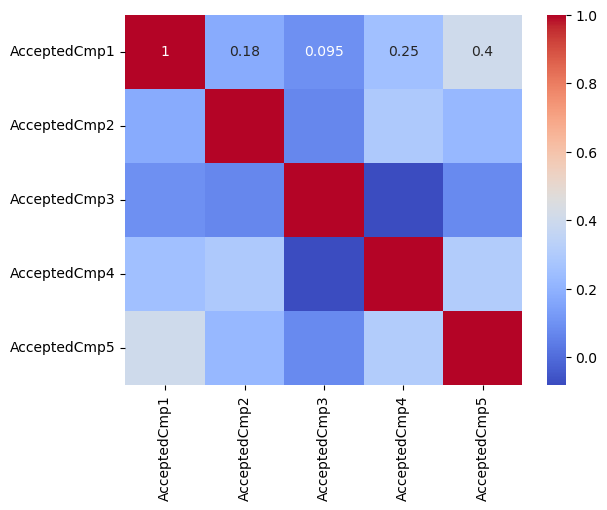

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Carregar os dados
purchase_df = pd.read_csv(r"C:\Users\EstudioFace Ipanema\ifood_purchase_profile.csv")
people_df = pd.read_csv(r"C:\Users\EstudioFace Ipanema\ifood_people.csv")
prev_campaing_df = pd.read_csv(r"C:\Users\EstudioFace Ipanema\ifood_previous_campaing.csv")
prev_campaing_df.drop(['Z_CostContact','Z_Revenue'], axis = 1,inplace = True)

# Unir os DataFrames
merged_df = pd.merge(purchase_df, people_df, left_on='ID', right_on='ID')
merged_df = pd.merge(merged_df, prev_campaing_df, left_on='ID', right_on='ID')
# Verificar dados faltantes
merged_df.isnull().sum()

# Tratar dados faltantes 
merged_df.fillna(0, inplace=True)

# Exemplo de criação de nova variável
merged_df['Total_Spent'] = merged_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
merged_df

# Analisar a aceitação das campanhas anteriores
sns.heatmap(merged_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\EstudioFace Ipanema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


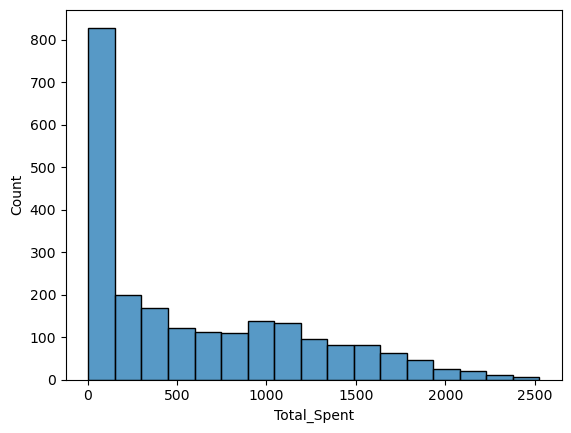

In [23]:
sns.histplot(merged_df['Total_Spent'])
plt.show()

In [26]:
# Frequência de compras
print(merged_df[['ID', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].describe())

                 ID  NumStorePurchases  NumWebPurchases  NumCatalogPurchases
count   2240.000000        2240.000000      2240.000000          2240.000000
mean    5592.159821           5.790179         4.084821             2.662054
std     3246.662198           3.250958         2.778714             2.923101
min        0.000000           0.000000         0.000000             0.000000
25%     2828.250000           3.000000         2.000000             0.000000
50%     5458.500000           5.000000         4.000000             2.000000
75%     8427.750000           8.000000         6.000000             4.000000
max    11191.000000          13.000000        27.000000            28.000000


In [27]:
# Análise de características demográficas
print(merged_df[['Income', 'Year_Birth', 'Kidhome', 'Teenhome']].describe())

              Income   Year_Birth      Kidhome     Teenhome
count    2240.000000  2240.000000  2240.000000  2240.000000
mean    51687.459375  1968.805804     0.444196     0.506250
std     25609.342730    11.984069     0.538398     0.544538
min         0.000000  1893.000000     0.000000     0.000000
25%     34722.000000  1959.000000     0.000000     0.000000
50%     51075.000000  1970.000000     0.000000     0.000000
75%     68289.750000  1977.000000     1.000000     1.000000
max    666666.000000  1996.000000     2.000000     2.000000


In [8]:
# Unindo todos os dataframes em um único dataframe
df = pd.merge(people_df, purchase_df, on="ID")
df = pd.merge(df, campaign_df, on="ID")

# Calculando a idade do cliente
df['Age'] = 2023 - df['Year_Birth']

# Total gasto em produtos
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Total de compras feitas
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Visualizando as alterações
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0 

In [10]:
# Matriz de correlação
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Distribuição de idade dos clientes
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Tratando valores faltantes (exemplo)
df.fillna(df.mean(), inplace=True)

# Codificação de variáveis categóricas (exemplo com 'Education')
df['Education'] = pd.Categorical(df['Education']).codes

ValueError: could not convert string to float: 'Graduation'

C:\Users\EstudioFace Ipanema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


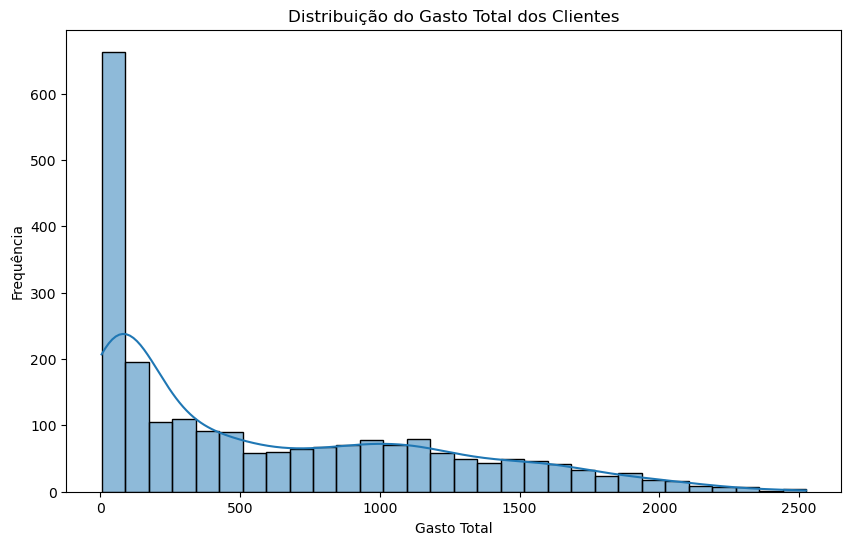

In [28]:
# Distribuição do gasto total
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total_Spent'], bins=30, kde=True)
plt.title('Distribuição do Gasto Total dos Clientes')
plt.xlabel('Gasto Total')
plt.ylabel('Frequência')
plt.show()

C:\Users\EstudioFace Ipanema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EstudioFace Ipanema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequência')

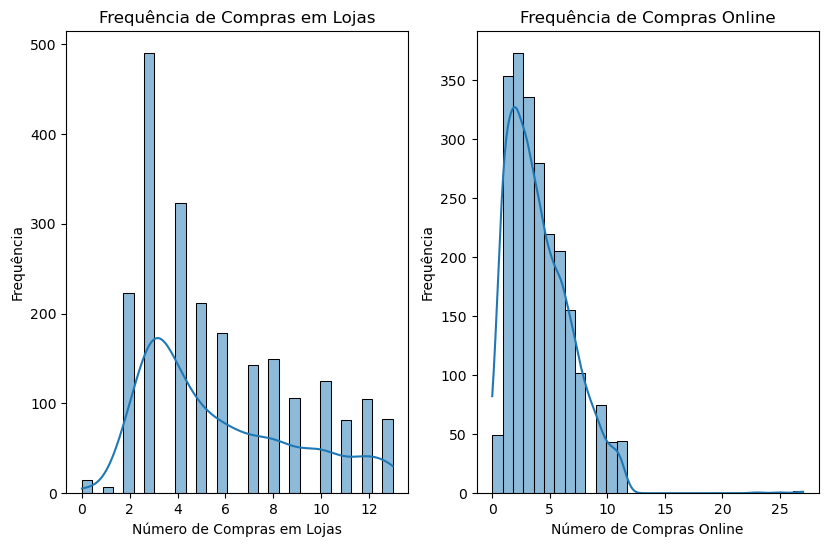

In [30]:
# Frequência de compras em lojas, online e por catálogo
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(merged_df['NumStorePurchases'], bins=30, kde=True)
plt.title('Frequência de Compras em Lojas')
plt.xlabel('Número de Compras em Lojas')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
sns.histplot(merged_df['NumWebPurchases'], bins=30, kde=True)
plt.title('Frequência de Compras Online')
plt.xlabel('Número de Compras Online')
plt.ylabel('Frequência')

C:\Users\EstudioFace Ipanema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


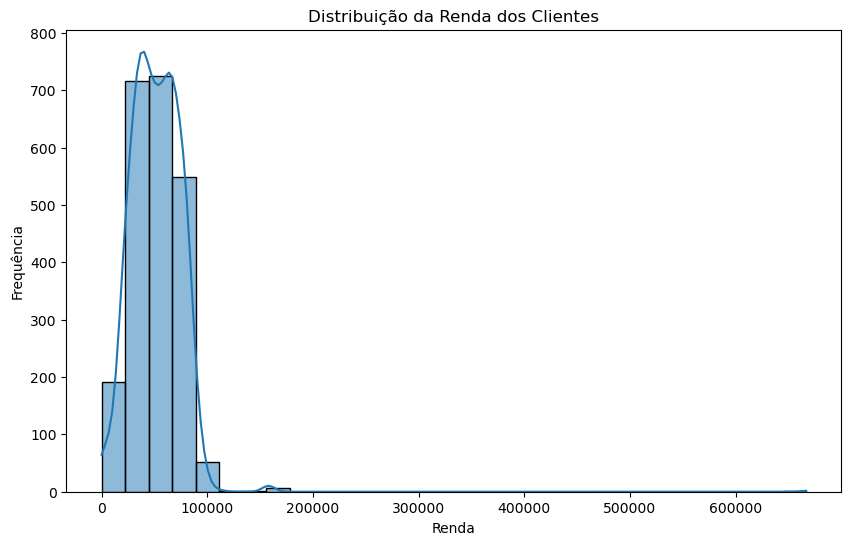

C:\Users\EstudioFace Ipanema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


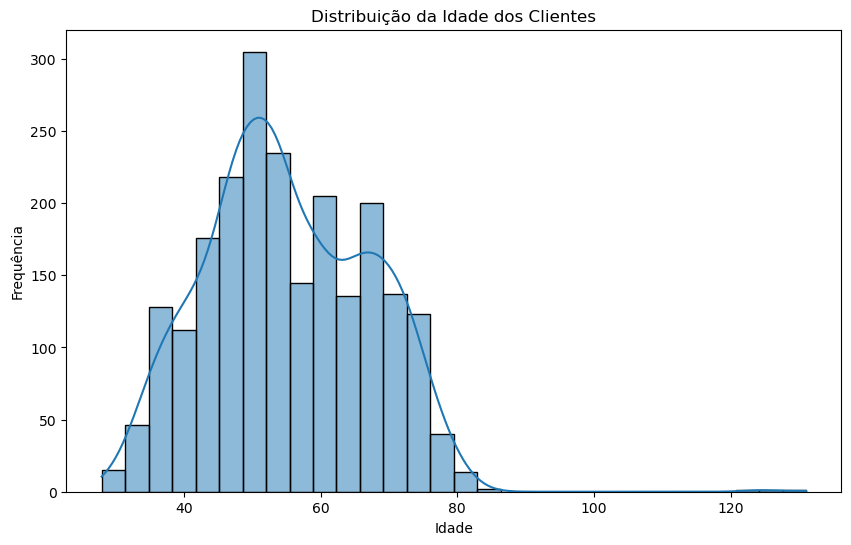

In [31]:
# Gráfico da distribuição da renda
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Income'], bins=30, kde=True)
plt.title('Distribuição da Renda dos Clientes')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

# Gráfico da distribuição da idade
merged_df['Age'] = 2024 - merged_df['Year_Birth']
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [34]:
# Gráfico de barras da segmentação por gasto total
plt.figure(figsize=(10, 6))
sns.countplot(x='Spending_Category', data=merged_df, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Número de Clientes por Categoria de Gasto')
plt.xlabel('Categoria de Gasto')
plt.ylabel('Número de Clientes')
plt.show()

ValueError: Could not interpret input 'Spending_Category'

<Figure size 1000x600 with 0 Axes>

In [33]:
# Gráfico de barras da segmentação por frequência de compras
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchase_Frequency', data=merged_df, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Número de Clientes por Frequência de Compras')
plt.xlabel('Frequência de Compras')
plt.ylabel('Número de Clientes')
plt.show()

ValueError: Could not interpret input 'Purchase_Frequency'

<Figure size 1000x600 with 0 Axes>

In [ ]:
ValueError: Could not interpret input 'Purchase_Frequency'